##This is used for viusalizing the trained embeddings

In [70]:
# Phu, Andrea and Watcher
# 2018 Spring
import numpy as np
import pandas as pd
import time
import os
import pickle
import string
import psutil
import sklearn

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from ggplot import *

import time
from sklearn.manifold import TSNE
import math


In [5]:
processed_data_path = '/data/Dropbox/judge_embedding_data_sp18'
all_data_save_path = os.path.join(processed_data_path,"finalized_all_data","all_data_dict.pkl")
all_data_support_save_path = os.path.join(processed_data_path,"finalized_all_data","all_data_dict_support.pkl")
all_data_df_save_path = os.path.join(processed_data_path,"finalized_all_data","all_data_df.h5")
finished_embedding_folder_path = os.path.join(processed_data_path,'finished_judge_embedding')


## read in data for each case

In [13]:
all_data_dict = pickle.load(open(all_data_save_path,"rb"))
topic_glove_emb = all_data_dict['topic_glove_emb'][0]
judgeId2Index = all_data_dict['judge_id_to_index'][0]
judgeIndex2Id = all_data_dict['judge_index_to_id'][0]
all_data_df = all_data_dict['data_df']
all_data_df

caseid  year      middle_part  \
0       XB0PMNQNB5G0  1891     contentMajOp   
1             XFL757  1891     contentMajOp   
2       XB0PMRQNB5G0  1891     contentMajOp   
3             XFL7KI  1891     contentMajOp   
4       XB0OI7QNB5G0  1891     contentMajOp   
5       XB0PHFQNB5G0  1891     contentMajOp   
6       XB0PJRQNB5G0  1891     contentMajOp   
7             XFL6PE  1891     contentMajOp   
8             XFL6LS  1891     contentMajOp   
9       XB0PNFQNB5G0  1891     contentMajOp   
10      XB0OOVQNB5G0  1891     contentMajOp   
11      XB0PMJQNB5G0  1891     contentMajOp   
12      XB0PNJQNB5G0  1891     contentMajOp   
13            XFL6R9  1891     contentMajOp   
14      XB0PJBQNB5G0  1891     contentMajOp   
15      XB0PNBQNB5G0  1891     contentMajOp   
16            XFL7OU  1891     contentMajOp   
17      XB0PINQNB5G0  1891     contentMajOp   
18      XEIVQNQNB5G0  1892     contentMajOp   
19            XFKJB7  1892     contentMajOp   
20            XFLJG8  1892     contentMajOp   
21            XFL735  1892     contentMajOp   
22            XFL81T  1892     contentMajOp   
23            XFL7E5  1892     contentMajOp   
24            XFLUMD  1892     contentMajOp   
25            XFLB0V  1892     contentMajOp   
26            XFL7CS  1892     contentMajOp   
27            XFLUUP  1892     contentMajOp   
28            XFLUV0  1892     contentMajOp   
29            XFL70E  1892     contentMajOp   
...              ...   ...              ...   
295477    X1JTA1U003  2013     contentDisOp   
295478      X1GIL1ON  2013     contentMajOp   
295479    X1JMAP6003  2013     contentMajOp   
295480    X1KGK2E003  2013     contentDisOp   
295481    X1KU7QU003  2013     contentConOp   
295482    X1L0PJQ003  2013     contentMajOp   
295483    X1J92S4003  2013     contentMajOp   
295484    X1JASM6003  2013     contentMajOp   
295485    X1JCLQU003  2013     contentMajOp   
295486    X1JJGKM003  2013     contentMajOp   
295487    X1JTELI003  2013     contentMajOp   
295488    X1J991E003  2013     contentMajOp   
295489    X1K8H20003  2013     contentMajOp   
295490    X1JR7Q6003  2013     contentMajOp   
295491    X1JCK6A003  2013     contentMajOp   
295492    X1JJUSG003  2013     contentMajOp   
295493    X1JTGNK003  2013     contentMajOp   
295494    X1J6SDQ003  2013     contentMajOp   
295495    X1JRCJ4003  2013     contentMajOp   
295496    X1JG6J8003  2013     contentMajOp   
295497    X1JIJJO003  2013     contentMajOp   
295498    X1L8IFI003  2013     contentMajOp   
295499      X1OL10ON  2013     contentMajOp   
295500    X1J2U48003  2013     contentMajOp   
295501      X1GERSGN  2013     contentMajOp   
295502    X1JII8I003  2013     contentMajOp   
295503    X1L6I84003  2013     contentMajOp   
295504    X1JR8SS003  2013  contentConDisOp   
295505    X1JV1VC003  2013     contentMajOp   
295506    X1K7T7M003  2013     contentMajOp   

                                             opinion_text  \
0       [0, 202, 1268, 13, 0, 4600, 3, 0, 247954, 128,...   
1       [15, 116, 4, 9238, 7, 22547, 3, 4092, 1219, 0,...   
2       [215, 6, 68193, 3527, 255, 9670, 5, 12375, 3, ...   
3       [5, 0, 935, 4951, 5, 8151, 0, 4490, 3, 0, 305,...   
4       [5214, 10, 894, 2091, 4297, 21, 0, 14485, 1268...   
5       [0, 377, 202, 3, 14963, 386, 92, 3, 745, 98, 0...   
6       [202, 1268, 21, 0, 14485, 38, 14, 60389, 187, ...   
7       [15, 116, 4, 18428, 0, 305, 4, 0, 1399, 202, 3...   
8       [3, 133, 10550, 10, 1609, 400000, 0, 58, 84, 4...   
9       [0, 2536, 3, 323, 1853, 128, 3, 50, 196, 7091,...   
10      [92, 231, 3, 3218, 7, 121, 231, 705, 6, 0, 92,...   
11      [4, 9238, 0, 1574, 6, 37, 202, 10, 0, 284, 199...   
12      [305, 3, 323, 1853, 1644, 3, 50, 196, 7091, 21...   
13      [1450, 6, 0, 3036, 202, 10, 0, 529, 377, 3, 74...   
14      [7, 87676, 3660, 4316, 450, 409, 9952, 21, 0, ...   
15      [239482, 46, 11778, 64, 0, 906, 2094, 4, 1280,...   
16      [32, 88293, 9431, 134, 22, 19246, 15, 8815, 4,...   
1

## first let's read in the trained embedding from disk

In [7]:
# judge emb trained with opinion vec, topic vec and ruling label
trained_judge_emb_path = os.path.join(finished_embedding_folder_path,"trained_emb_May1.pkl")

In [8]:
trained_judge_emb = pickle.load(open(trained_judge_emb_path,"rb"))

In [9]:
trained_judge_emb.shape

(2099, 500)

In [30]:
naive_judge_emb_path = os.path.join(finished_embedding_folder_path,"naive_judge_emb_dict.pkl")
naive_judge_emb_dict = pickle.load(open(naive_judge_emb_path,"rb"))

In [31]:
naive_judge_emb_dict.keys()

dict_keys(['allyears', 'year1891', 'year1901', 'year1911', 'year1921', 'year1931', 'year1941', 'year1951', 'year1961', 'year1971', 'year1981', 'year1991', 'year2001'])

In [32]:
naive_judge_emb = naive_judge_emb_dict['allyears']

## we first normalize embeddings to make each judge's vector is of unit norm

In [33]:
def normalize_to_unit_emb(emb):
    norms = np.linalg.norm(emb,axis=1).reshape(-1,1)
    normalized_emb = emb/norms
    return normalized_emb


In [ ]:
normalized_emb = normalize_to_unit_emb(trained_judge_emb)

In [34]:
naive_judge_emb_normalized = normalize_to_unit_emb(naive_judge_emb)

## Do PCA and TSNE to reduce dimensions

In [18]:
# do pca
pca3 = PCA(n_components=3)
pca3_result = pca3.fit_transform(normalized_emb)

pca50 = PCA(n_components=50)
pca50_result = pca50.fit_transform(normalized_emb)

In [19]:
# do tsne
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=10000)
tsne_results = tsne.fit_transform(pca50_result)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2099 samples in 0.006s...
[t-SNE] Computed neighbors for 2099 samples in 0.472s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2099
[t-SNE] Computed conditional probabilities for sample 2000 / 2099
[t-SNE] Computed conditional probabilities for sample 2099 / 2099
[t-SNE] Mean sigma: 0.075966
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.607834
[t-SNE] Error after 6950 iterations: 1.300146


In [20]:
tsne_results.shape

(2099, 2)

In [36]:
# do pca
pca3_naive = PCA(n_components=3)
pca3_result_naive = pca3.fit_transform(naive_judge_emb_normalized)

pca50_naive = PCA(n_components=50)
pca50_result_naive = pca50.fit_transform(naive_judge_emb_normalized)

# do tsne
time_start = time.time()
tsne_naive = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=5000)
tsne_results_naive = tsne_naive.fit_transform(pca50_result_naive)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2099 samples in 0.005s...
[t-SNE] Computed neighbors for 2099 samples in 0.742s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2099
[t-SNE] Computed conditional probabilities for sample 2000 / 2099
[t-SNE] Computed conditional probabilities for sample 2099 / 2099
[t-SNE] Mean sigma: 0.017371
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.017433
[t-SNE] Error after 3450 iterations: 1.560227


## now we can make plots, and we want to color the plots in different ways, that means we need to have these coloring labels. So we want the judges bio data

In [21]:
# we now read in the judge bio data
judge_bio_path = os.path.join(processed_data_path,"JudgesBioReshaped_TOUSE.dta")
judge_bio_df = pd.read_stata(judge_bio_path)


songername  judgeidentificationnumber  Term       id  \
0                ABRAMS, RONNIE                       3419     1      NaN   
1           ABRUZZO, MATTHEW J.                          1     1      2.0   
2            ACHESON, MARCUS W.                          2     1      4.0   
3            ACHESON, MARCUS W.                          2     2      5.0   
4     ACKER, WILLIAM MARSH, JR.                          3     1     10.0   
5       ACKERMAN, HAROLD ARNOLD                          4     1     15.0   
6         ACKERMAN, JAMES WALDO                          5     1     20.0   
7         ACKERMAN, JAMES WALDO                          5     2      NaN   
8            ACOSTA, RAYMOND L.                          6     1     25.0   
9        ADAIR, JEFFERSON LEROY                          7     1     30.0   
10              ADAMS, ARLIN M.                          8     1     35.0   
11              ADAMS, ELMER B.                          9     1     40.0   
12              ADAMS, ELMER B.                          9     2     45.0   
13                ADAMS, GEORGE                         10     1     49.0   
14                ADAMS, GEORGE                         10     2      NaN   
15                ADAMS, GEORGE                         10     3      NaN   
16        ADAMS, GEORGE BETHUNE                         11     1     50.0   
17             ADAMS, HENRY LEE                         12     1  23230.0   
18               ADAMS, JOHN R.                       2989     1  30323.0   
19             ADAMSON, WILLIAM                       3295     1      NaN   
20             ADELMAN, LYNN S.                       2717     1  30074.0   
21       ADKINS, JESSE CORCORAN                         13     1     55.0   
22           ADLER, SIMON LOUIS                         14     1     60.0   
23             AFRICK, LANCE M.                       2927     1  30229.0   
24              AGEE, G. STEVEN                       3174     1      NaN   
25           AGUILAR, ROBERT P.                         15     1     65.0   
26                AIKEN, ANN L.                       2750     1  30073.0   
27            AINSWORTH, ROBERT                         16     1     70.0   
28            AINSWORTH, ROBERT                         16     2     75.0   
29           AKERMAN, ALEXANDER                         17     1     80.0   
...                         ...                        ...   ...      ...   
4066  WYZANSKI, CHARLES E., JR.                       2669     1  21560.0   
4067        YANKWICH, LEON RENE                       2670     1  21580.0   
4068        YANKWICH, LEON RENE                       2670     2      NaN   
4069     YEAKEL, EARL LEROY III                       3017     1  30407.0   
4070      YOHN, WILLIAM H., JR.                       2671     1  22300.0   
4071          YOUMANS, FRANK A.                       2672     1  21600.0   
4072              YOUNG, DON J.                       2673     1  21620.0   
4073              YOUNG, GEORGE                       3316     1      NaN   
4074     YOUNG, GEORGE CRESSLER                       2674     1  21640.0   
4075     YOUNG, GEORGE CRESSLER                       2674     2      NaN   
4076     YOUNG, GEORGE CRESSLER                       2674     3      NaN   
4077           YOUNG, GORDON E.                       2675     1  21660.0   
4078         YOUNG, JAMES SCOTT                       2676     1  21680.0   
4079           YOUNG, JOSEPH H.                       2677     1  21700.0   
4080          YOUNG, RICHARD L.                       2754     1  30045.0   
4081          YOUNG, WILLIAM G.                       2678     1  21740.0   
4082  YOUNGDAHL, LUTHER WALLACE                       2679     1  21760.0   
4083            ZAGEL, JAMES B.                       2680     1  21780.0   
4084             ZAINEY, JAY C.                       2918     1  30231.0   
4085         ZAMPANO, ROBERT C.                       2681     1  21800.0   
4086           ZA

## First simply plot the embeddings, without coloring

In [41]:
# we use ggplot with pandas dataframe
# we first create a new dataframe, this
# dataframe contains the x,y coordinates for plot,
# as well as all the possible coloring labels
df_plot = pd.DataFrame()
df_plot['x-pca'] = pca3_result[:,0]
df_plot['y-pca'] = pca3_result[:,1]
df_plot['x-tsne'] = tsne_results[:,0]
df_plot['y-tsne'] = tsne_results[:,1]

df_plot['x-pca-naive'] = pca3_result_naive[:,0]
df_plot['y-pca-naive'] = pca3_result_naive[:,1]
df_plot['x-tsne-naive'] = tsne_results_naive[:,0]
df_plot['y-tsne-naive'] = tsne_results_naive[:,1]

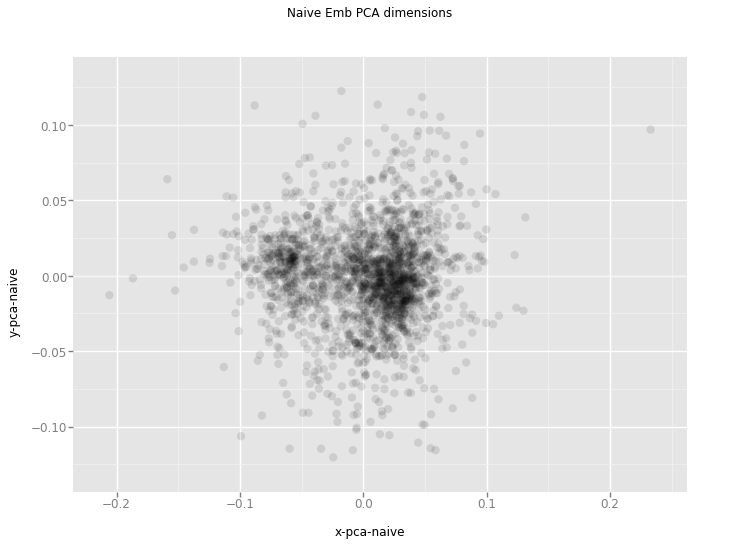

<ggplot: (-9223363258843657205)>

In [42]:
chart = ggplot( df_plot, aes(x='x-pca-naive', y='y-pca-naive') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("Naive Emb PCA dimensions")
chart

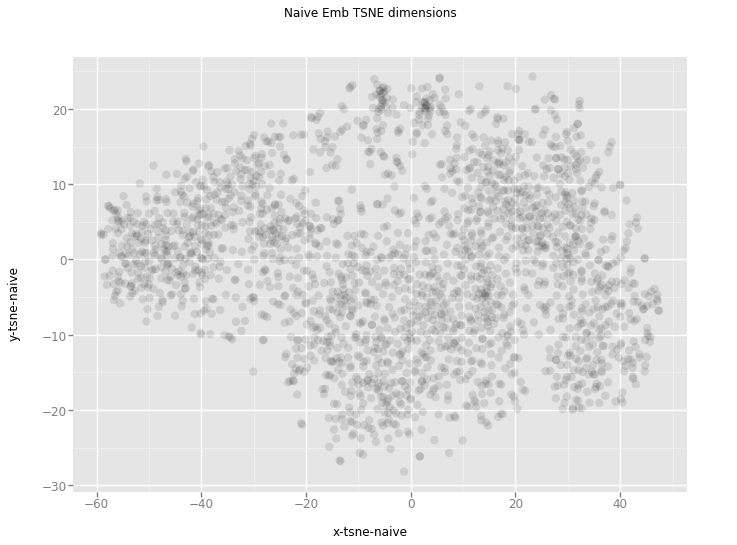

<ggplot: (-9223363258843743039)>

In [43]:
chart = ggplot( df_plot, aes(x='x-tsne-naive', y='y-tsne-naive') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("Naive Emb TSNE dimensions")
chart

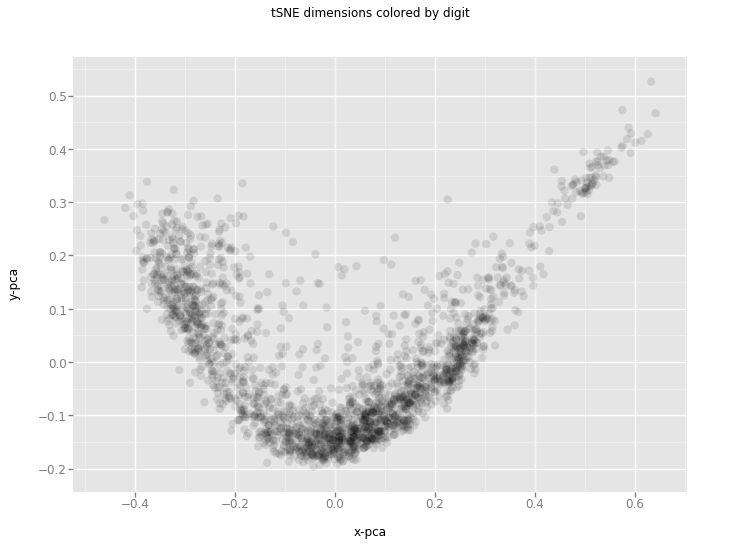

<ggplot: (8778011007636)>

In [44]:
chart = ggplot( df_plot, aes(x='x-pca', y='y-pca') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("PCA 10 epoch 0.5 dropout")
chart

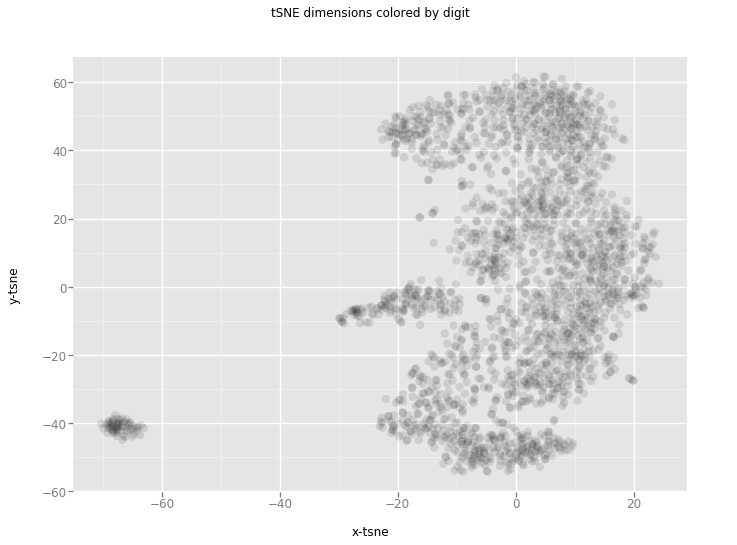

<ggplot: (8778010850673)>

In [45]:
chart = ggplot( df_plot, aes(x='x-tsne', y='y-tsne')) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit")
chart

## Now we want to add color labels into df_plot

In [69]:
all_data_df.loc[all_data_df['judgeidentificationnumber'] <4]

caseid  year   middle_part  \
10    XB0OOVQNB5G0  1891  contentMajOp   
31          XFLJK6  1892  contentMajOp   
90          XFLV88  1892  contentMajOp   
102         XFLJIQ  1892  contentMajOp   
112         XFLBBA  1892  contentMajOp   
121         XFLUNU  1892  contentMajOp   
209         XFLJLH  1892  contentMajOp   
248         XFLB5D  1892  contentMajOp   
257         XFV9C6  1892  contentMajOp   
315         XUCN5F  1893  contentMajOp   
316         XFL95R  1893  contentMajOp   
410         XV19K3  1893  contentMajOp   
427         XV17QJ  1893  contentMajOp   
432         XPU7L3  1893  contentMajOp   
447   XBBD5JQNB5G0  1893  contentMajOp   
489         XV196B  1893  contentMajOp   
555         XPU6GR  1893  contentMajOp   
603         XFL92V  1893  contentMajOp   
703         XFKK8N  1894  contentMajOp   
710         XFKH67  1894  contentMajOp   
713         XFP1OK  1894  contentMajOp   
761         XFKI97  1894  contentMajOp   
848         XFL36F  1894  contentMajOp   
858         XFKI2H  1894  contentMajOp   
892         XFL33V  1894  contentMajOp   
903         XFKK3M  1894  contentMajOp   
1157        XFKUVU  1895  contentMajOp   
1188        XFLPDV  1895  contentMajOp   
1223        XFKNCN  1895  contentMajOp   
1261        XFLPDA  1895  contentMajOp   
...            ...   ...           ...   
7077       XILND0N  1905  contentMajOp   
7161  XBBEJ3QNB5G0  1905  contentMajOp   
7200  XBBB2JQNB5G0  1905  contentMajOp   
7217        XFKIAD  1905  contentMajOp   
7257        XFL1CB  1905  contentMajOp   
7274  XCBNIFQNB5G0  1905  contentMajOp   
7296  XBBB23QNB5G0  1905  contentMajOp   
7336        XFKHRR  1905  contentMajOp   
7370        XFKQQA  1905  contentMajOp   
7371       XILNDON  1905  contentMajOp   
7375        XFL7TG  1905  contentMajOp   
7435        XFKBHR  1905  contentMajOp   
7455       XILNK8N  1905  contentMajOp   
7471        XFL6NR  1905  contentMajOp   
7492        XFL1ML  1905  contentMajOp   
7502        XFL6VO  1905  contentDisOp   
7507        XFKIL2  1905  contentMajOp   
7582        XFITON  1906  contentMajOp   
7717        XFITPO  1906  contentMajOp   
7727        XFL16Q  1906  contentMajOp   
7767        XFL14M  1906  contentMajOp   
7894        XFITR5  1906  contentMajOp   
7910        XFL1QS  1906  contentMajOp   
7921        XFITLE  1906  contentMajOp   
7955        XFL1SQ  1906  contentMajOp   
7965        XFL1P6  1906  contentMajOp   
8040        XFITNE  1906  contentMajOp   
8041        XFL81F  1906  contentMajOp   
8141        XFL14N  1906  contentMajOp   
8202        XFL1AB  1906  contentMajOp   

                                           opinion_text          songername  \
10    [92, 231, 3, 3218, 7, 121, 231, 705, 6, 0, 92,...  ACHESON, MARCUS W.   
31    [22265, 1614, 4139, 15, 7024, 31163, 5, 35267,...  ACHESON, MARCUS W.   
90    [324, 10102, 279, 1146, 0, 14485, 1268, 5, 659...  ACHESON, MARCUS W.   
102   [4, 1449, 5064, 2133, 20, 2303, 6026, 64, 0, 4...  ACHESON, MARCUS W.   
112   [487, 422, 9860, 5, 12, 122, 4316, 12080, 6429...  ACHESON, MARCUS W.   
121   [845, 21, 279, 5025, 399432, 5, 1074, 1534, 82...  ACHESON, MARCUS W.   
209   [10, 0, 13947, 3, 2673, 5996, 5990, 487, 657, ...  ACHESON, MARCUS W.   
248   [3, 0, 5555, 36509, 2203, 98, 0, 1370, 245071,...  ACHESON, MARCUS W.   
257   [6455, 3, 0, 3036, 202, 3, 0, 104, 112, 10, 0,...  ACHESON, MARCUS W.   
315   [21, 3257, 2624, 187, 0, 60389, 98, 0, 1989, 2...  ACHESON, MARCUS W.   
316   [12, 13, 487, 176, 9525, 0, 14485, 116, 7, 953...  ACHESON, MARCUS W.   
410   [6, 3347, 25, 29, 460, 3, 0, 377, 202, 116, 44...  ACHESON, MARCUS W.   
427   [6455, 9022, 7, 7169, 12018, 0, 91, 995, 5005,...  ACHESON, MARCUS W.   
432   [5776, 3, 0, 1509, 2637, 121, 231, 98, 0, 1001...  ACHESON, MARCUS W.   
447   [5309, 128, 7, 2680, 3, 0, 92, 3, 1989, 25, 0,...  ACHESON, MARCUS W.   
489   [10, 303, 3, 7, 4817, 13782, 3, 475, 0, 202, 1...  ACHESON, MARCUS W.   
555   [21, 893, 3420, 1893, 98, 1833, 7, 61653, 0, 6...  ACHESON

In [22]:
pd.options.display.max_columns = 999
judge_bio_df


songername  judgeidentificationnumber  Term       id  \
0                ABRAMS, RONNIE                       3419     1      NaN   
1           ABRUZZO, MATTHEW J.                          1     1      2.0   
2            ACHESON, MARCUS W.                          2     1      4.0   
3            ACHESON, MARCUS W.                          2     2      5.0   
4     ACKER, WILLIAM MARSH, JR.                          3     1     10.0   
5       ACKERMAN, HAROLD ARNOLD                          4     1     15.0   
6         ACKERMAN, JAMES WALDO                          5     1     20.0   
7         ACKERMAN, JAMES WALDO                          5     2      NaN   
8            ACOSTA, RAYMOND L.                          6     1     25.0   
9        ADAIR, JEFFERSON LEROY                          7     1     30.0   
10              ADAMS, ARLIN M.                          8     1     35.0   
11              ADAMS, ELMER B.                          9     1     40.0   
12              ADAMS, ELMER B.                          9     2     45.0   
13                ADAMS, GEORGE                         10     1     49.0   
14                ADAMS, GEORGE                         10     2      NaN   
15                ADAMS, GEORGE                         10     3      NaN   
16        ADAMS, GEORGE BETHUNE                         11     1     50.0   
17             ADAMS, HENRY LEE                         12     1  23230.0   
18               ADAMS, JOHN R.                       2989     1  30323.0   
19             ADAMSON, WILLIAM                       3295     1      NaN   
20             ADELMAN, LYNN S.                       2717     1  30074.0   
21       ADKINS, JESSE CORCORAN                         13     1     55.0   
22           ADLER, SIMON LOUIS                         14     1     60.0   
23             AFRICK, LANCE M.                       2927     1  30229.0   
24              AGEE, G. STEVEN                       3174     1      NaN   
25           AGUILAR, ROBERT P.                         15     1     65.0   
26                AIKEN, ANN L.                       2750     1  30073.0   
27            AINSWORTH, ROBERT                         16     1     70.0   
28            AINSWORTH, ROBERT                         16     2     75.0   
29           AKERMAN, ALEXANDER                         17     1     80.0   
...                         ...                        ...   ...      ...   
4066  WYZANSKI, CHARLES E., JR.                       2669     1  21560.0   
4067        YANKWICH, LEON RENE                       2670     1  21580.0   
4068        YANKWICH, LEON RENE                       2670     2      NaN   
4069     YEAKEL, EARL LEROY III                       3017     1  30407.0   
4070      YOHN, WILLIAM H., JR.                       2671     1  22300.0   
4071          YOUMANS, FRANK A.                       2672     1  21600.0   
4072              YOUNG, DON J.                       2673     1  21620.0   
4073              YOUNG, GEORGE                       3316     1      NaN   
4074     YOUNG, GEORGE CRESSLER                       2674     1  21640.0   
4075     YOUNG, GEORGE CRESSLER                       2674     2      NaN   
4076     YOUNG, GEORGE CRESSLER                       2674     3      NaN   
4077           YOUNG, GORDON E.                       2675     1  21660.0   
4078         YOUNG, JAMES SCOTT                       2676     1  21680.0   
4079           YOUNG, JOSEPH H.                       2677     1  21700.0   
4080          YOUNG, RICHARD L.                       2754     1  30045.0   
4081          YOUNG, WILLIAM G.                       2678     1  21740.0   
4082  YOUNGDAHL, LUTHER WALLACE                       2679     1  21760.0   
4083            ZAGEL, JAMES B.                       2680     1  21780.0   
4084             ZAINEY, JAY C.                       2918     1  30231.0   
4085         ZAMPANO, ROBERT C.                       2681     1  21800.0   
4086           ZA

In [86]:
df_plot['gender'] = '' # gender: M/F
df_plot['Circuitjudge'] = '' # circuit number
df_plot['presidentname'] = ''
df_plot['placeofbirthcity'] = ''
df_plot['placeofbirthstate'] = ''
df_plot['raceorethnicity'] = '' # White, Hispanic, etc
df_plot['partyaffiliationofpresident'] = '' # Democratic, Republican, Reassignment
df_plot['nameofschool1'] = ''
df_plot['SchoolState1'] = ''
df_plot['Public1'] = '' # public or private (convert from 0/1)
df_plot['birthyear'] = '' # need conversion from year to maybe group by decade

def convertPublicLabel(label):
    if label == 1: # public
        return 'public'
    else:
        return 'private'
    
def convertYearLabelToDecade(label):
    return math.floor(label/10)*10 # e.g. 1931 is now 1930
    

for judge_index in range(2099):
    judge_id = judgeIndex2Id[judge_index]
    judge_bio_rows = judge_bio_df.loc[judge_bio_df['judgeidentificationnumber']==judge_id]
    judge_bio_row = judge_bio_rows.iloc[0] # this is the first row
    df_plot.iat[judge_index,df_plot.columns.get_loc('gender')] = judge_bio_row['genderNew']
    df_plot.iat[judge_index,df_plot.columns.get_loc('Circuitjudge')] =str(int(judge_bio_row['Circuitjudge'])) 
    
    df_plot.iat[judge_index,df_plot.columns.get_loc('presidentname')] = judge_bio_row['presidentname']
    df_plot.iat[judge_index,df_plot.columns.get_loc('placeofbirthcity')] = judge_bio_row['placeofbirthcity']
    df_plot.iat[judge_index,df_plot.columns.get_loc('placeofbirthstate')] = judge_bio_row['placeofbirthstate']
    df_plot.iat[judge_index,df_plot.columns.get_loc('raceorethnicity')] = judge_bio_row['raceorethnicity']
    df_plot.iat[judge_index,df_plot.columns.get_loc('partyaffiliationofpresident')] = judge_bio_row['partyaffiliationofpresident']
    df_plot.iat[judge_index,df_plot.columns.get_loc('nameofschool1')] = judge_bio_row['nameofschool1']
    df_plot.iat[judge_index,df_plot.columns.get_loc('SchoolState1')] = judge_bio_row['SchoolState1']
    df_plot.iat[judge_index,df_plot.columns.get_loc('Public1')] =convertPublicLabel(judge_bio_row['Public1']) 
    df_plot.iat[judge_index,df_plot.columns.get_loc('birthyear')] = convertYearLabelToDecade(judge_bio_row['birthyear'])  
    

    
    

In [87]:
listOfColorLabels = ['gender','Circuitjudge','presidentname','placeofbirthstate',
                     'raceorethnicity','partyaffiliationofpresident','SchoolState1',
                     'Public1','birthyear']
# we will not do cities since there are too many... can make the graph crush

In [72]:
df_plot

x-pca     y-pca     x-tsne     y-tsne  x-pca-naive  y-pca-naive  \
0    -0.306759  0.059827   8.609572  50.742836    -0.057695     0.011781   
1     0.125220 -0.099177   0.681247 -20.875156    -0.077273     0.024235   
2    -0.094729 -0.140403   9.556385  15.832125    -0.082806     0.034216   
3     0.510135  0.329417 -67.485229 -42.534496    -0.054492     0.056148   
4    -0.046165 -0.171290  18.164034  10.320745    -0.076219     0.024418   
5     0.058233 -0.111415   4.005257 -15.920318    -0.110763     0.052652   
6    -0.258947  0.039836  16.735094  44.678082    -0.084798     0.006987   
7    -0.190728  0.168273 -15.935199  36.213261    -0.085701     0.004735   
8    -0.153776 -0.103933  12.732692  26.855030    -0.057783     0.011718   
9    -0.301669  0.070456   7.294288  46.450146    -0.042756     0.004723   
10   -0.267661  0.216363 -15.636038  48.354515    -0.057295     0.016013   
11   -0.278111  0.115165  -9.354104  43.011864    -0.060220     0.015784   
12   -0.402387  0.273820  -2.149639  58.259720    -0.064123     0.003163   
13   -0.208195  0.040381  23.561211  16.063736    -0.057371     0.007183   
14   -0.325534  0.257806  -7.984457  53.447323    -0.092974     0.028054   
15    0.019392 -0.141084  20.204781   2.781687    -0.070490    -0.014221   
16   -0.218493 -0.048914   4.574443  29.251757    -0.065854     0.008624   
17    0.198870 -0.026571   5.663846 -32.426590    -0.077999     0.046739   
18   -0.173516  0.050803 -14.074716  37.206940    -0.077364     0.010158   
19    0.116171 -0.097791   5.240416 -22.984619    -0.105333     0.027679   
20   -0.251113 -0.004206   3.780941  33.893303    -0.071096     0.011985   
21    0.112776  0.182856 -14.804423 -30.617968    -0.065972     0.016955   
22   -0.093075 -0.104521  -2.516265  18.789846    -0.101534     0.016995   
23   -0.168449  0.147426 -15.682303  40.587532    -0.058980     0.011031   
24    0.026727  0.026979 -12.640830 -22.466719    -0.055658     0.010479   
25    0.176869  0.047641  -4.397485 -22.064283    -0.043589     0.012446   
26   -0.228635  0.033179  11.157523  38.860638    -0.053416     0.024067   
27    0.195121  0.092490 -27.110214  -6.445547    -0.032308    -0.015019   
28    0.085329 -0.111954  10.878924 -23.406925    -0.063017     0.036846   
29   -0.223801 -0.079627   5.913422  31.481508    -0.124259     0.011303   
...        ...       ...        ...        ...          ...          ...   
2069 -0.023193 -0.170353   9.266572   8.476108     0.038174    -0.024934   
2070 -0.244351 -0.028928  12.604656  39.449421     0.032467    -0.000499   
2071  0.522380  0.375638 -65.346260 -39.972923     0.026412     0.083016   
2072 -0.095778 -0.059839 -13.445774  35.764977     0.037961    -0.022604   
2073 -0.015617  0.065108 -14.773646  31.333908     0.023793    -0.030151   
2074 -0.136947 -0.039222  11.558795  25.861134     0.042231     0.003153   
2075 -0.096343 -0.114327   2.095941  18.557318     0.038007    -0.013502   
2076  0.219782 -0.019985   2.344095 -45.072319     0.097138     0.024329   
2077 -0.065544 -0.167796  12.406308   9.871538     0.041962     0.015179   
2078 -0.063323 -0.077163  -7.230180  23.706512    -0.006145    -0.044728   
2079  0.269946  0.064590  -9.183629 -45.182087     0.027414     0.054120   
2080 -0.074997 -0.161862  14.791288  12.633104     0.035958    -0.012592   
2081  0.067960 -0.011057 -13.794398 -23.518610     0.019337    -0.008889   
2082 -0.162081 -0.099907  21.797918  14.662909     0.038359    -0.015385   
2083  0.145678 -0.127597   9.074496 -19.949314     0.001692    -0.015440   
2084  0.146040 -0.038484   7.962916 -30.648735     0.001283    -0.066882   
2085  0.208969 -0.064788   5.459024 -46.466743    -0.002707     0.010286   
2086 -0.008066 -0.166311  16.607624  -4.030276    -0.013702    -0.045852   
2087  0.101941 -0.090173  -7.634120   4.277187     0.024606    -0.022913   
2088  0.030839 -0.153615  -8.520538 -11.857925     0.005286     0.008529   
2089  0.199267 -0.032910  -8.742300 -25.987480     0.0353

In [108]:
def plotWithLabel(df,xname,yname,colorLabel,title,size=40,alpha=0.25):
    # plot the embedding with a certain label
    chart = ggplot(df, aes(x=xname, y=yname,color=colorLabel)) \
        + geom_point(size=size,alpha=alpha) \
        + ggtitle(title)
    return chart

In [109]:
settings = [['x-tsne-naive','y-tsne-naive','tsne on naive embedding'],
            ['x-tsne','y-tsne','tsne on trained embedding']]
charts = []
for colorLabel in listOfColorLabels:
    for setting in settings:
        newChart = plotWithLabel(df_plot,setting[0],setting[1],colorLabel,setting[2])
        charts.append(newChart)

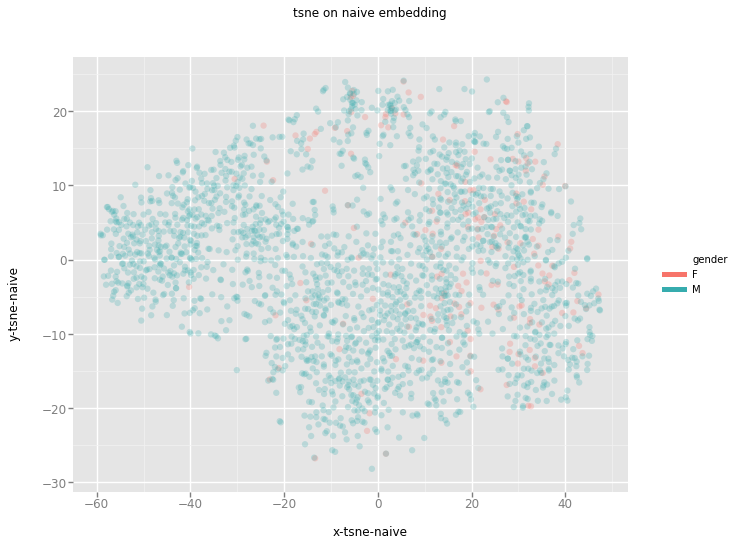

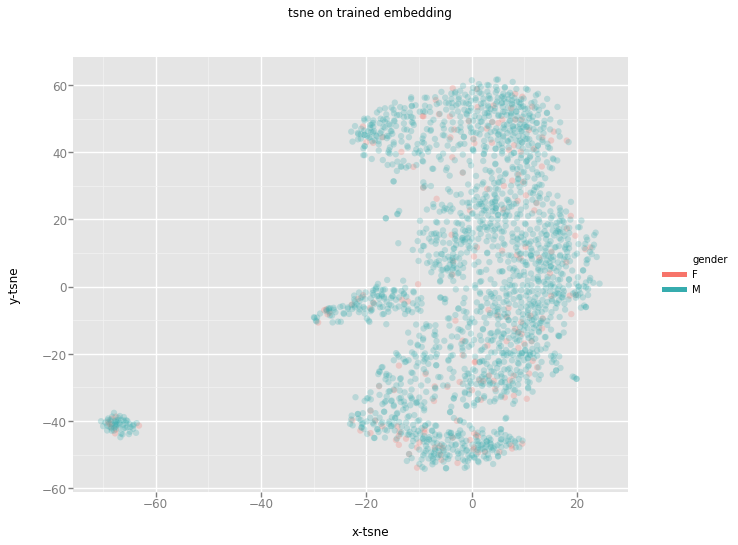

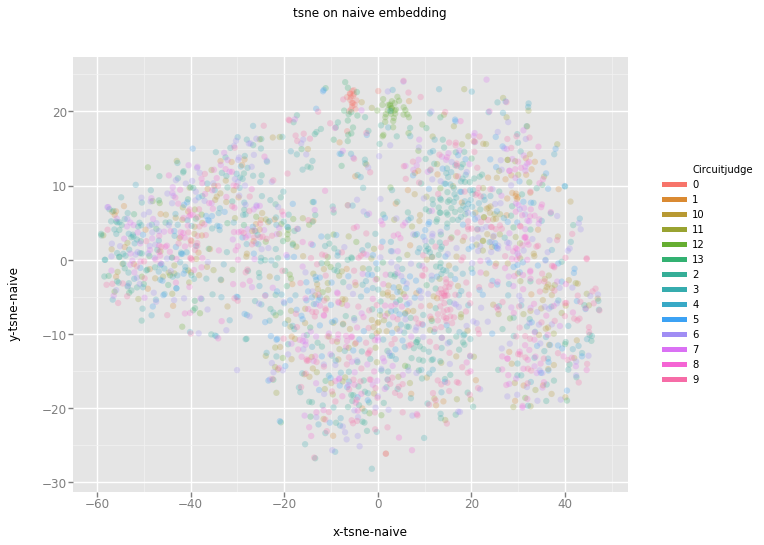

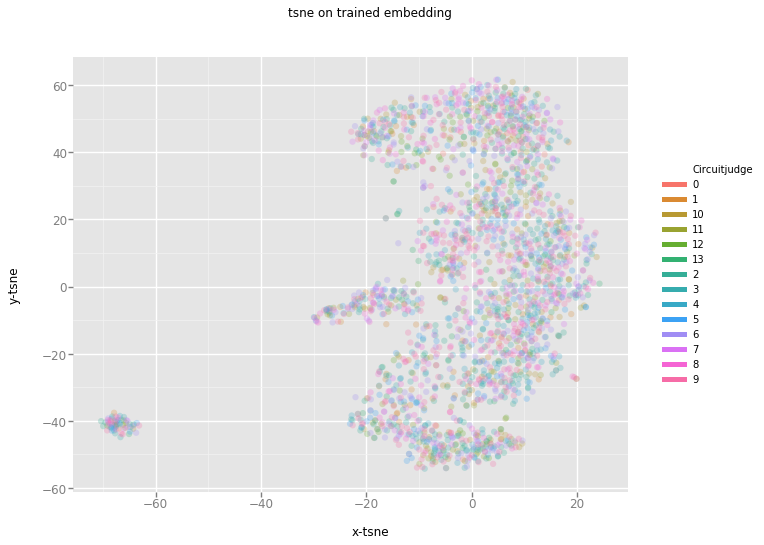

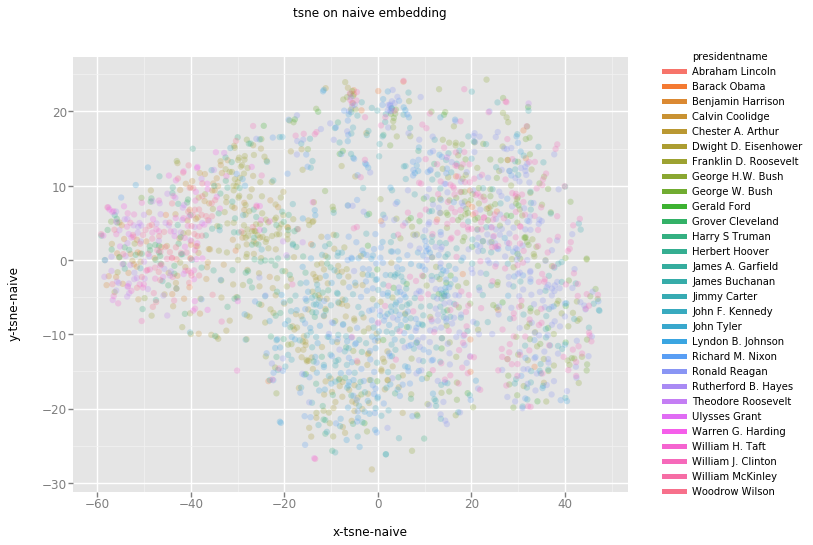

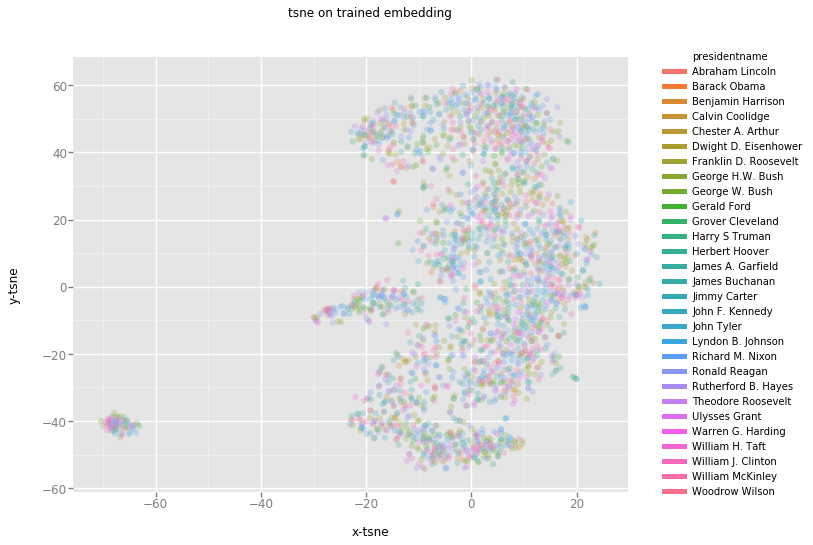

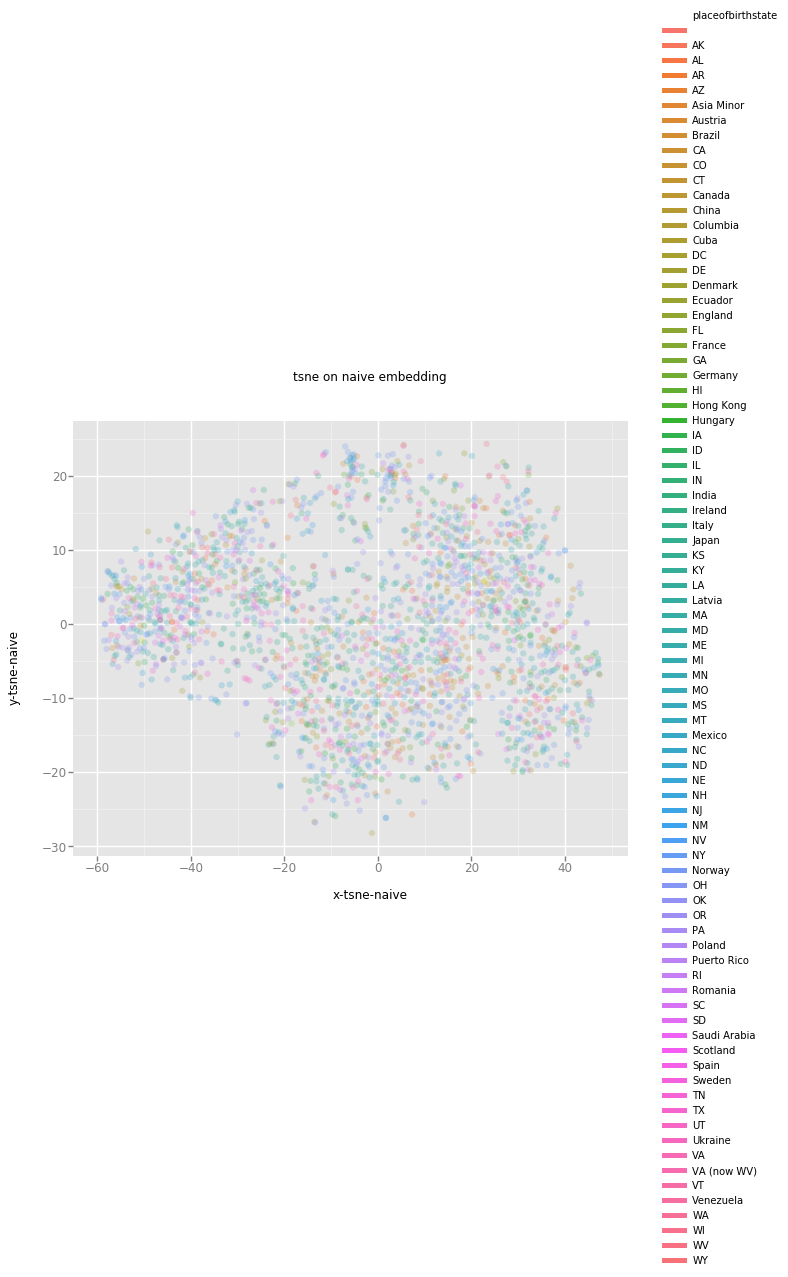

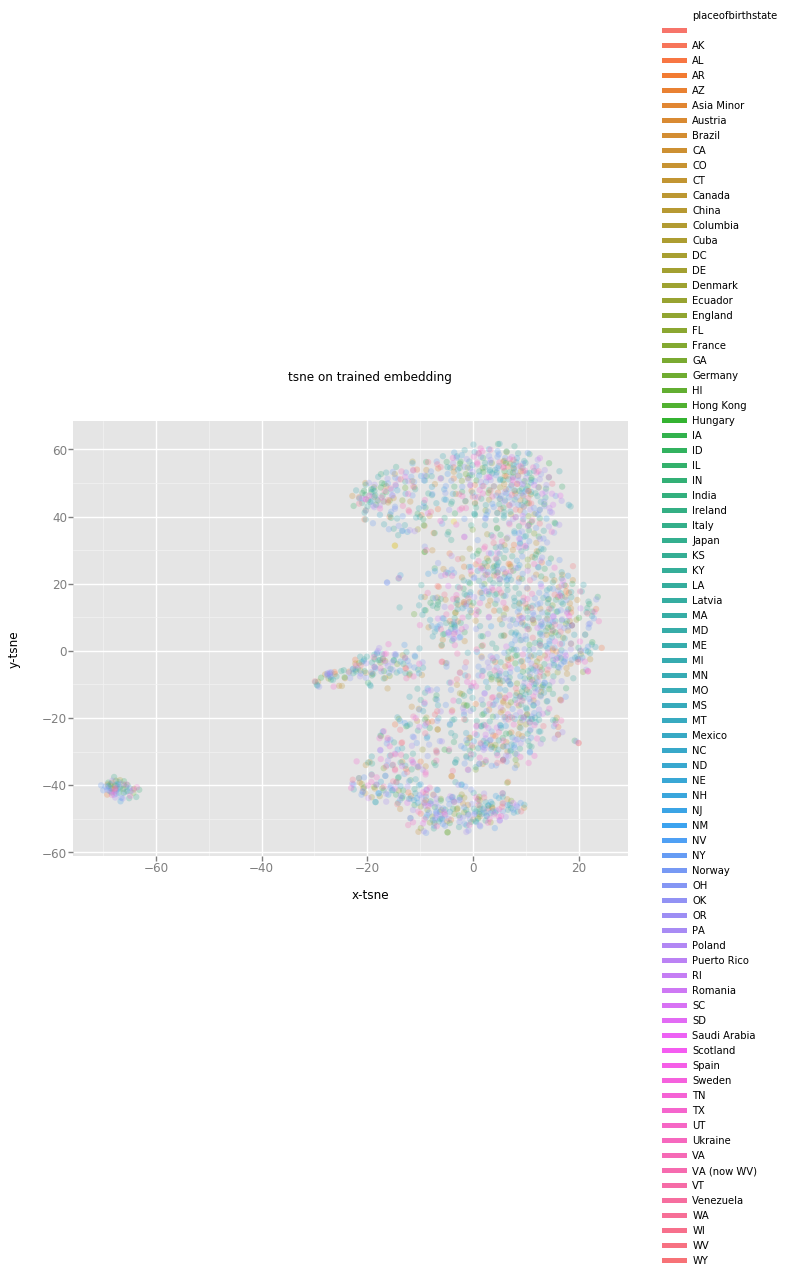

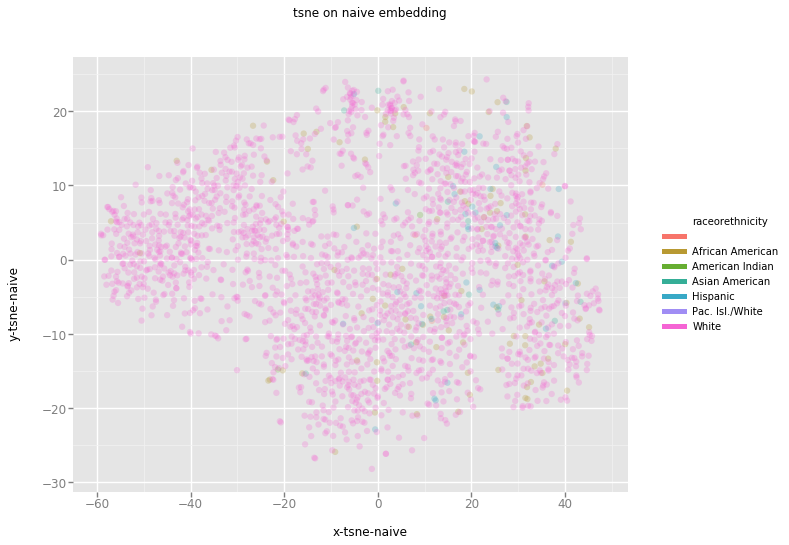

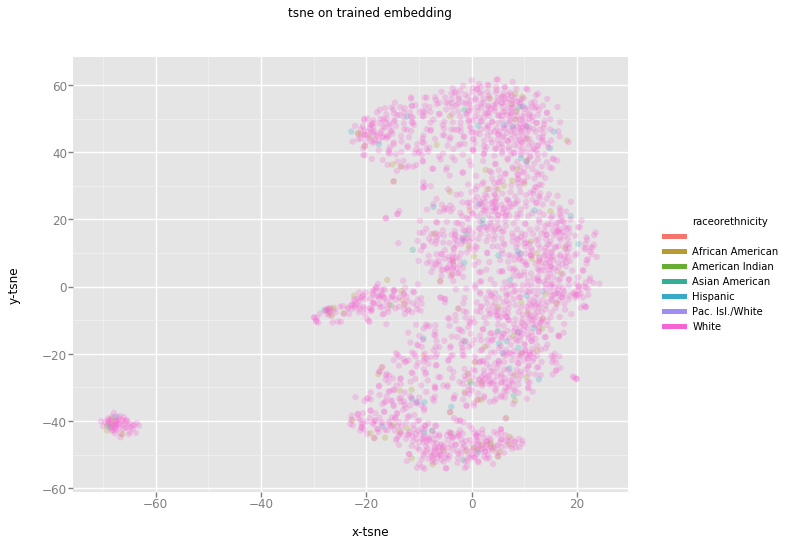

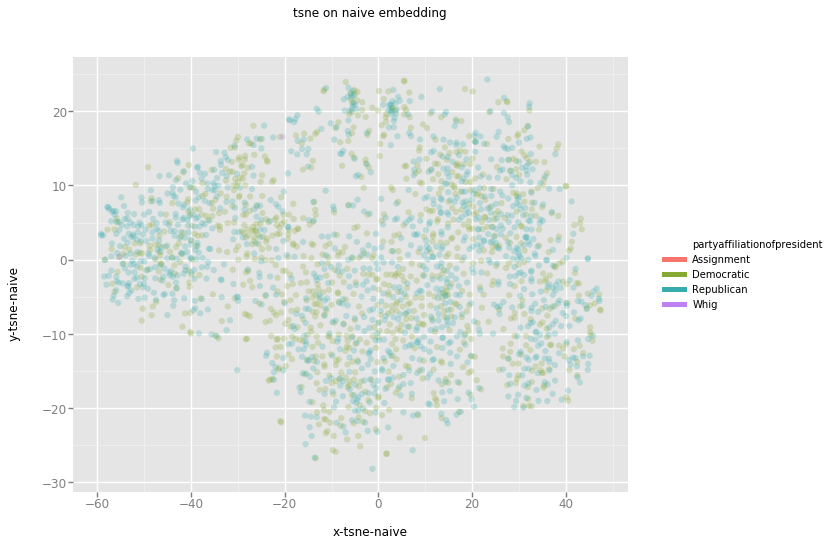

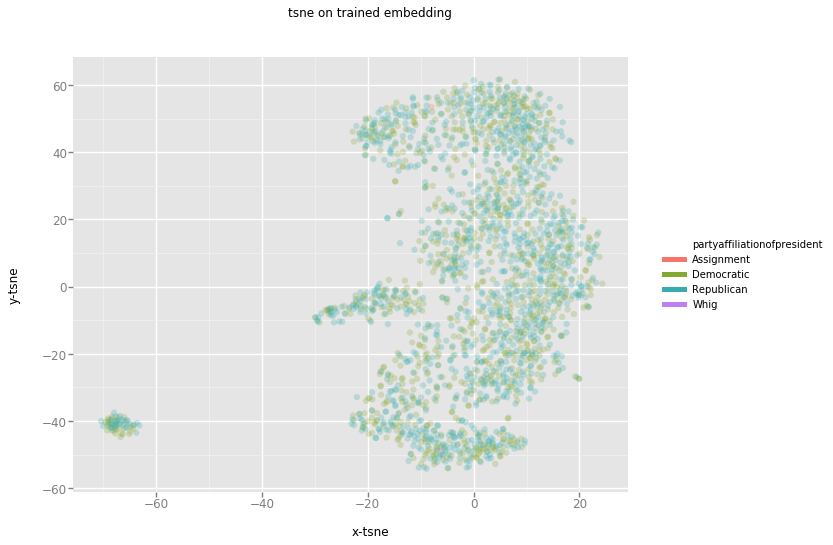

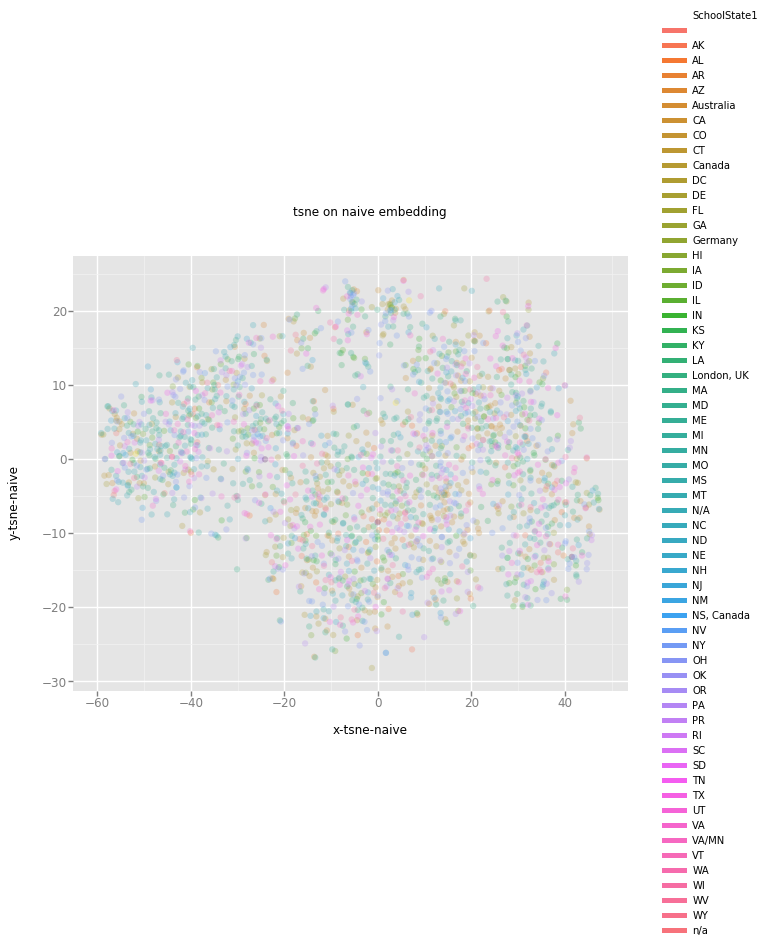

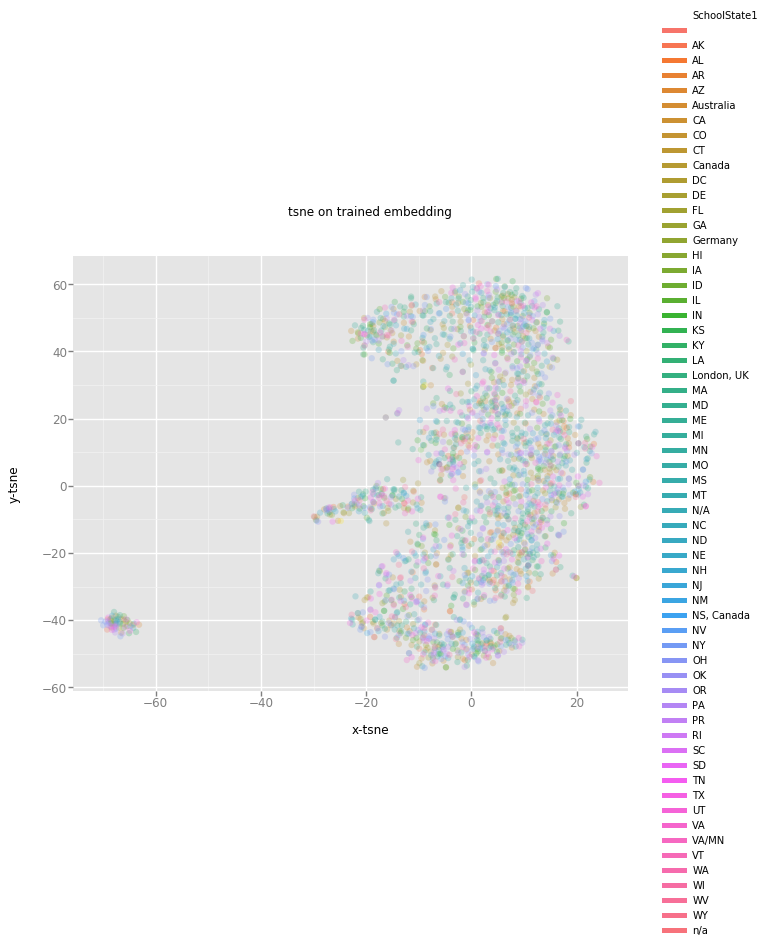

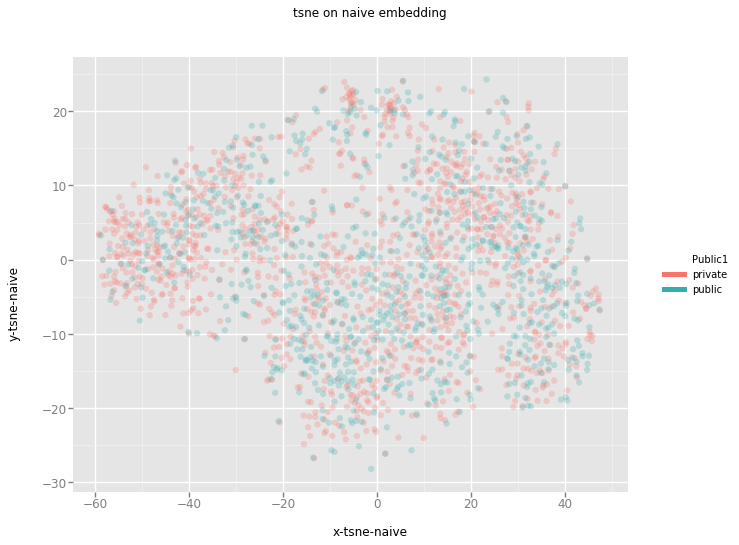

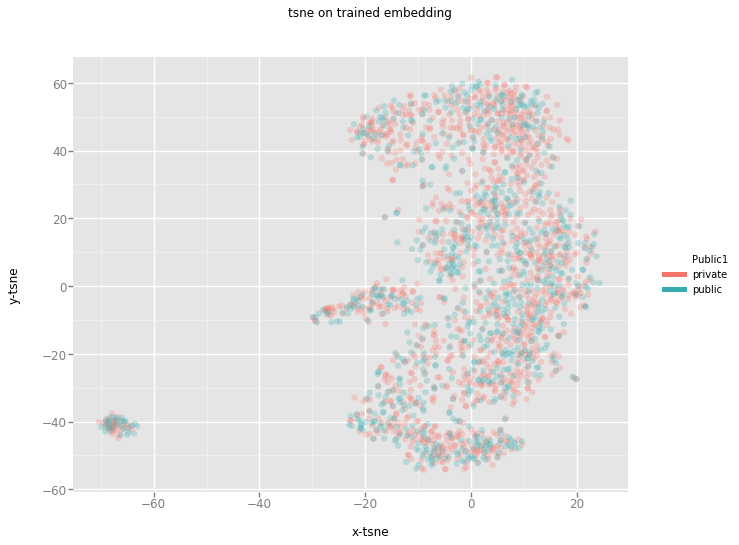

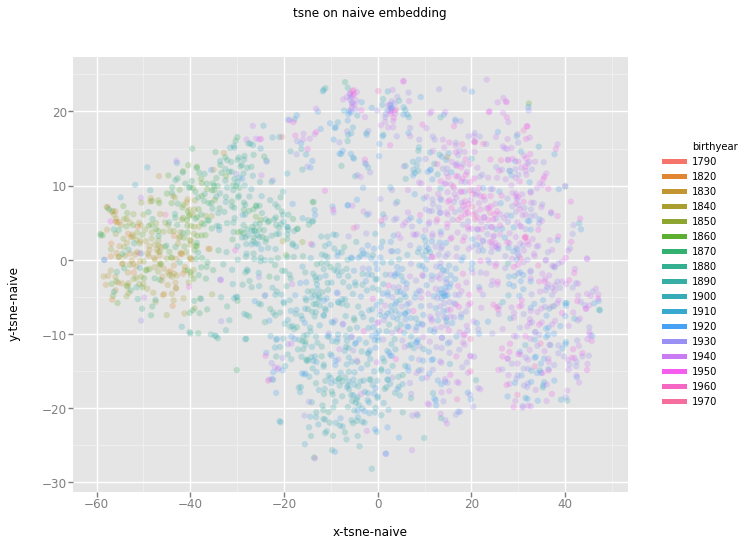

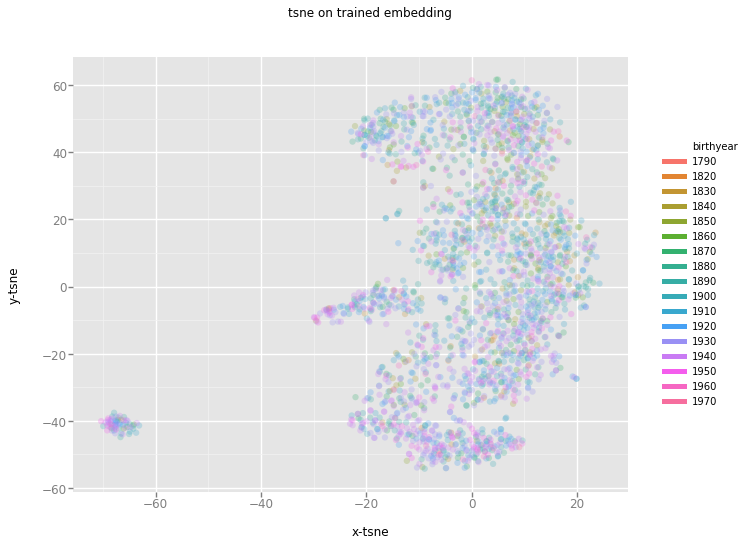

[<ggplot: (-9223363258841898415)>,
 <ggplot: (8778012883874)>,
 <ggplot: (-9223363258841892078)>,
 <ggplot: (8778008276579)>,
 <ggplot: (8778008401286)>,
 <ggplot: (-9223363258846377002)>,
 <ggplot: (8778008398663)>,
 <ggplot: (8778010991357)>,
 <ggplot: (-9223363258846376097)>,
 <ggplot: (8778008391372)>,
 <ggplot: (-9223363258846384608)>,
 <ggplot: (-9223363258846499184)>,
 <ggplot: (-9223363258846381901)>,
 <ggplot: (8778008393764)>,
 <ggplot: (-9223363258842686923)>,
 <ggplot: (8778012081826)>,
 <ggplot: (-9223363258842691598)>,
 <ggplot: (8778012084067)>]

In [110]:
charts